In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Feature total_bedrooms has null values

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


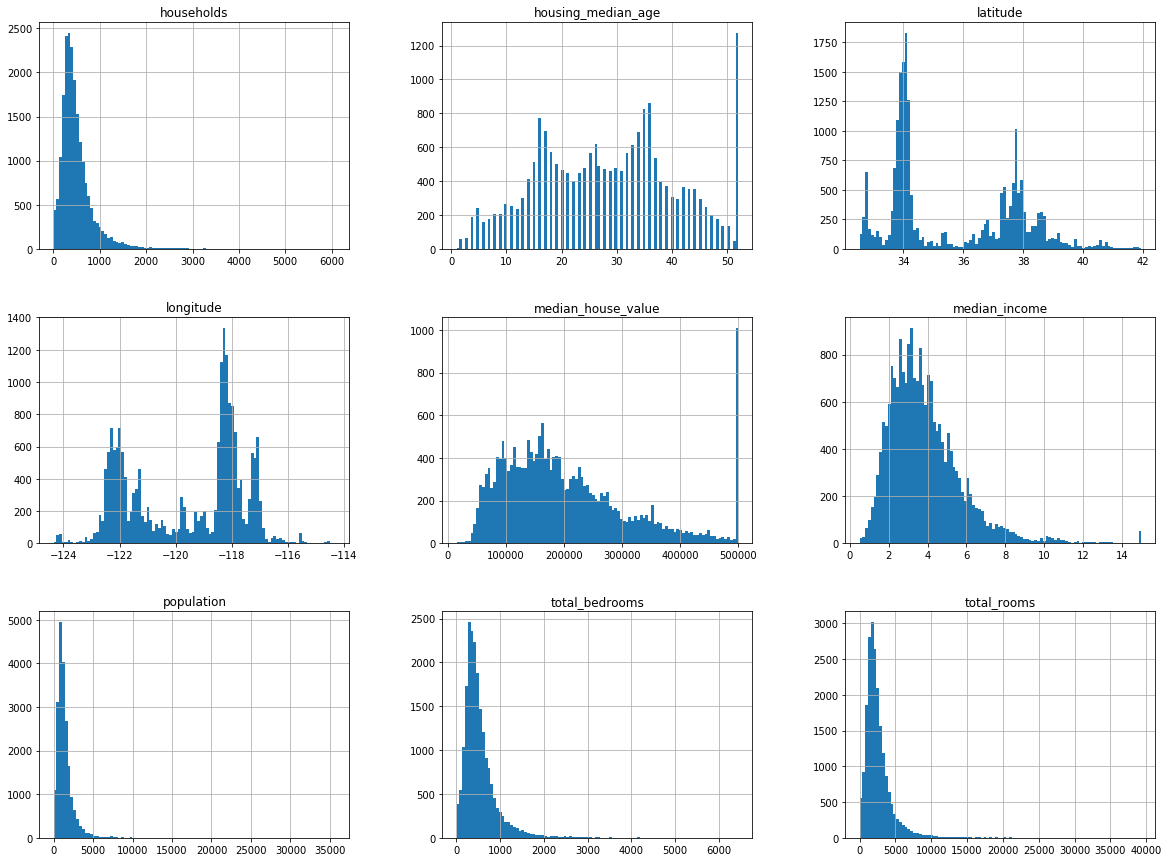

In [6]:
df.hist(bins=100, figsize=(20,15));

There is a spike at the end of housing_median_age, median_income and median_house_value

In [7]:
df[df['median_house_value']==500001].shape

(965, 10)

Seems like the data is capped and all the values above 500000 are kept as 500001

Dropping the Null values

In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.shape

(20433, 10)

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=13)

In [11]:
df_train.shape, df_test.shape

((16346, 10), (4087, 10))

In [12]:
df_corr = df.corr()
df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


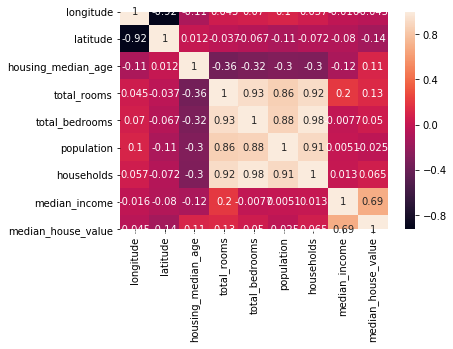

In [13]:
sns.heatmap(df_corr, annot=True)

Features total_rooms, total_bedrooms, population and households are highly correlated to each other.

median_income is highly correlated to median_house_value

We can drop total_rooms, total_bedrooms, population and households, and instead have a new feature rooms_per_house

In [14]:
df_train['rooms_per_house'] = df_train['total_rooms'] / df_train['households']

C:\Users\Gala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house
8332,-118.35,33.93,26.0,3156.0,857.0,2394.0,787.0,3.0100,191900.0,<1H OCEAN,4.010165
15052,-117.11,32.90,16.0,2043.0,388.0,705.0,352.0,4.4766,161500.0,<1H OCEAN,5.803977
13531,-117.28,34.06,2.0,1658.0,290.0,868.0,304.0,5.1365,136700.0,INLAND,5.453947
992,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,215500.0,INLAND,5.975831
2672,-115.40,32.86,19.0,1087.0,171.0,649.0,173.0,3.3182,113800.0,INLAND,6.283237


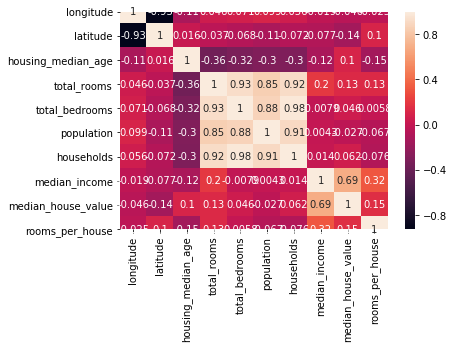

In [16]:
sns.heatmap(df_train.corr(), annot=True)

In [17]:
df_train.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)

C:\Users\Gala\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df_train.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_house
8332,-118.35,33.93,26.0,3.0100,191900.0,<1H OCEAN,4.010165
15052,-117.11,32.90,16.0,4.4766,161500.0,<1H OCEAN,5.803977
13531,-117.28,34.06,2.0,5.1365,136700.0,INLAND,5.453947
992,-121.80,37.69,17.0,5.4324,215500.0,INLAND,5.975831
2672,-115.40,32.86,19.0,3.3182,113800.0,INLAND,6.283237


ocean_proximity is a Categorical feature.
Using OneHotEncoder to convert it.

In [19]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_arr = cat_encoder.fit_transform(df_train[['ocean_proximity']]).toarray()
df_cat = pd.DataFrame(cat_arr)

In [20]:
df_cat.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [21]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [22]:
df_cat.columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [23]:
df_train.reset_index(drop=True, inplace=True)

In [24]:
df_train = pd.concat([df_train, df_cat], axis=1)

In [25]:
df_train.drop('ocean_proximity', axis=1, inplace=True)

In [26]:
X_train = df_train.drop('median_house_value', axis=1)
y_train = df_train['median_house_value']

In [27]:
X_train.head()

,longitude,latitude,housing_median_age,median_income,rooms_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.35,33.93,26.0,3.0100,4.010165,1.0,0.0,0.0,0.0,0.0
1,-117.11,32.90,16.0,4.4766,5.803977,1.0,0.0,0.0,0.0,0.0
2,-117.28,34.06,2.0,5.1365,5.453947,0.0,1.0,0.0,0.0,0.0
3,-121.80,37.69,17.0,5.4324,5.975831,0.0,1.0,0.0,0.0,0.0
4,-115.40,32.86,19.0,3.3182,6.283237,0.0,1.0,0.0,0.0,0.0


In [28]:
y_train.head()

0    191900.0
1    161500.0
2    136700.0
3    215500.0
4    113800.0
Name: median_house_value, dtype: float64

Let's apply simple LinearRegression 

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.predict(X_train)

array([193998.53908538, 235539.77238895, 178456.97404331, ...,
       183644.08677974, 182919.89081299, 256288.35225253])

Training Score

In [31]:
from sklearn.metrics import mean_squared_error

X_train_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, X_train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

72384.68643127017

In [32]:
df_test['rooms_per_house'] = df_test['total_rooms'] / df_test['households']

C:\Users\Gala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_test.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)

C:\Users\Gala\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
cat_arr = cat_encoder.transform(df_test[['ocean_proximity']]).toarray()
df_cat = pd.DataFrame(cat_arr)

In [35]:
df_cat.columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [36]:
df_test.reset_index(drop=True, inplace=True)

In [37]:
df_test = pd.concat([df_test, df_cat], axis=1)

In [38]:
df_test.drop('ocean_proximity', axis=1, inplace=True)

In [39]:
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test['median_house_value']

Testing Score

In [40]:
X_test_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, X_test_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

71573.15405507633